In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
course_data = pd.read_csv('C:/Users/Avani/Documents/MScProj/Data/coursedata.csv')
course_data.head()

,course_id,course_name,course_levelrank,duration,no_of_enrollments,no_of_ratings,course_rating,created_time,creator_name
0,1,Power BI_Intermediate,1,6,5000,909,4.0,12-11-2019,Arch Davidman
1,2,Azure IaaS_Beginner,1,25,3000,750,4.0,02-11-2021,Karia Bretelle
2,3,Tableau_Beginner,2,12,7000,2996,5.0,20-09-2022,Keene Elrick
3,4,Azure IaaS_Intermediate,1,20,2000,1982,4.0,10-10-2017,Whitby Goodricke
4,5,SQL_Expert,3,35,4000,1958,4.0,19-07-2019,Benedetto Melhuish


In [3]:
missing_course_data = course_data.isnull().sum()
missing_course_data

course_id              0
course_name            0
course_levelrank       0
duration               0
no_of_enrollments      0
no_of_ratings          0
course_rating        193
created_time           0
creator_name           0
dtype: int64

The course_rating column has 202 missing values.

In [4]:
# Checking for duplicates 
duplicate_course_data = course_data.duplicated().sum()
duplicate_course_data

0

Text(0, 0.5, 'Frequency')

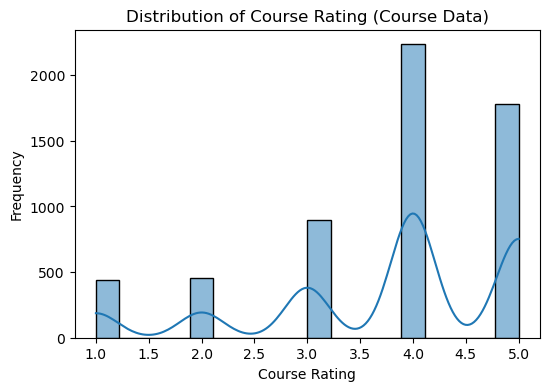

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))

# Distribution of course_rating in course data
sns.histplot(course_data['course_rating'], kde=True, ax=axes)
axes.set_title('Distribution of Course Rating (Course Data)')
axes.set_xlabel('Course Rating')
axes.set_ylabel('Frequency')


#### Distribution of Course Rating (Course Data):
It appears that most courses have ratings between 3 and 5, with a noticeable dip in courses with a rating of 1. The distribution also seems to be slightly left-skewed, indicating that courses tend to have higher ratings overall.


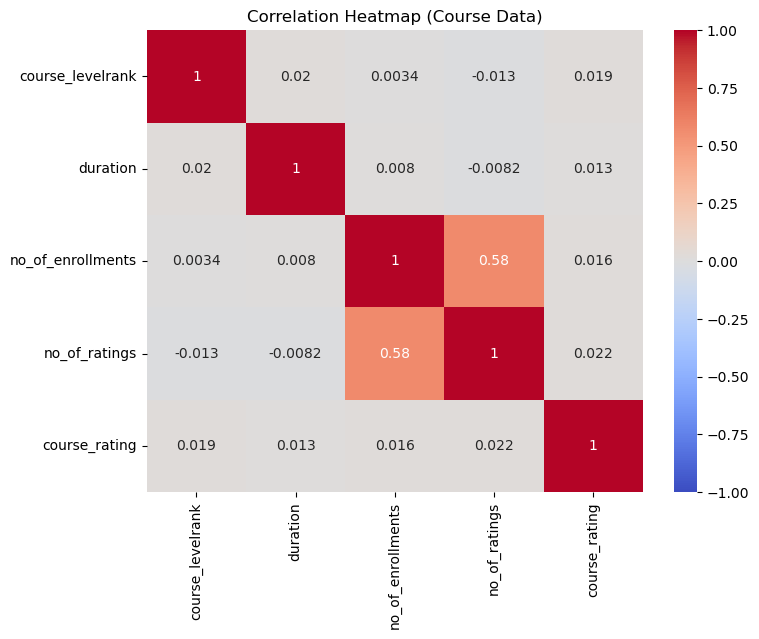

In [6]:
# Correlation matrix for course data
correlation_matrix_course = course_data[['course_levelrank', 'duration', 'no_of_enrollments', 'no_of_ratings', 'course_rating']].corr()

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_course, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap (Course Data)')
plt.show()


The heatmap provides a visual representation of the correlations between different attributes in the coursedata.csv dataset. Here are some insights:

course_levelrank and duration: There's a weak positive correlation between the course's rank level and its duration.

no_of_enrollments and no_of_ratings: There's a strong positive correlation between the number of enrollments and the number of ratings. This makes sense since courses with more enrollments are likely to receive more ratings.

course_rating: This attribute does not have strong correlations with any other attribute. This suggests that the rating of a course is not heavily influenced by its duration, level rank, number of enrollments, or number of rating

### Course Popularity

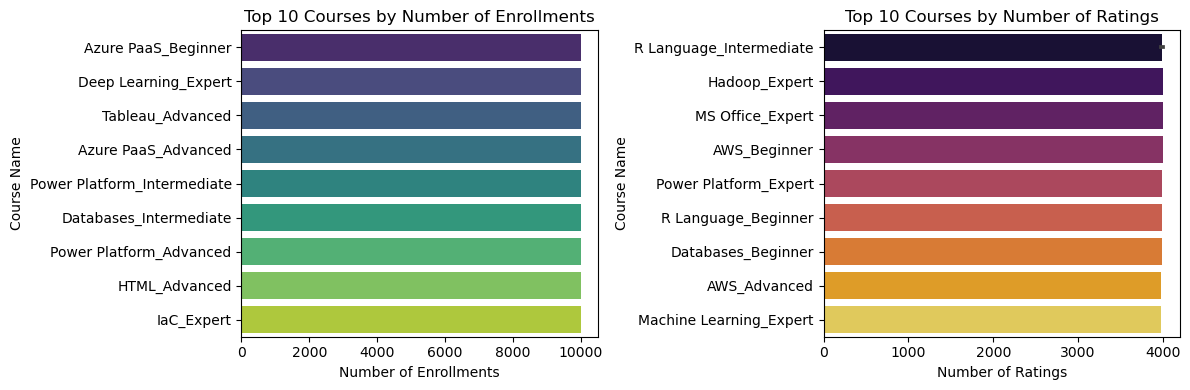

In [7]:
# Top 10 courses based on number of enrollments
top_courses_enrollments = course_data.sort_values(by='no_of_enrollments', ascending=False).head(10)

# Top 10 courses based on number of ratings
top_courses_ratings = course_data.sort_values(by='no_of_ratings', ascending=False).head(10)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plotting top 10 courses based on enrollments
sns.barplot(x='no_of_enrollments', y='course_name', data=top_courses_enrollments, ax=axes[0], palette='viridis')
axes[0].set_title('Top 10 Courses by Number of Enrollments')
axes[0].set_xlabel('Number of Enrollments')
axes[0].set_ylabel('Course Name')

# Plotting top 10 courses based on ratings
sns.barplot(x='no_of_ratings', y='course_name', data=top_courses_ratings, ax=axes[1], palette='inferno')
axes[1].set_title('Top 10 Courses by Number of Ratings')
axes[1].set_xlabel('Number of Ratings')
axes[1].set_ylabel('Course Name')

plt.tight_layout()
plt.show()


### Course Duration

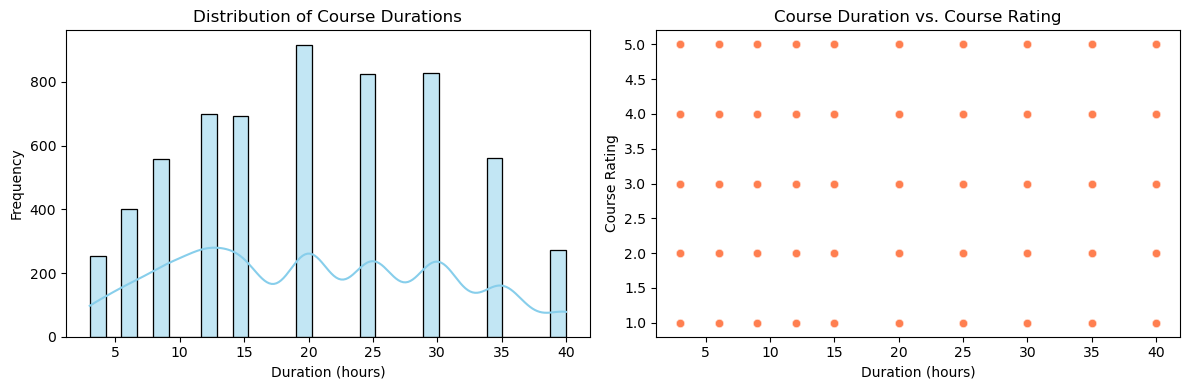

In [8]:
# Distribution of course durations and relation with ratings
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plotting distribution of course durations
sns.histplot(course_data['duration'], kde=True, ax=axes[0], bins=30, color='skyblue')
axes[0].set_title('Distribution of Course Durations')
axes[0].set_xlabel('Duration (hours)')
axes[0].set_ylabel('Frequency')

# Plotting relationship between duration and ratings
sns.scatterplot(x='duration', y='course_rating', data=course_data, ax=axes[1], alpha=0.6, color='coral')
axes[1].set_title('Course Duration vs. Course Rating')
axes[1].set_xlabel('Duration (hours)')
axes[1].set_ylabel('Course Rating')

plt.tight_layout()
plt.show()


#### Distribution of Course Durations:
Most courses have a duration of fewer than 10 hours, with a peak around 2-3 hours. Shorter courses seem to be more prevalent.
#### Course Duration vs. Course Rating:
There doesn't appear to be a strong linear trend between course duration and rating. However, it's notable that longer courses (beyond 40 hours) have varied ratings. Shorter courses also have a wide range of ratings, from low to high.

### Course Ratings over Time

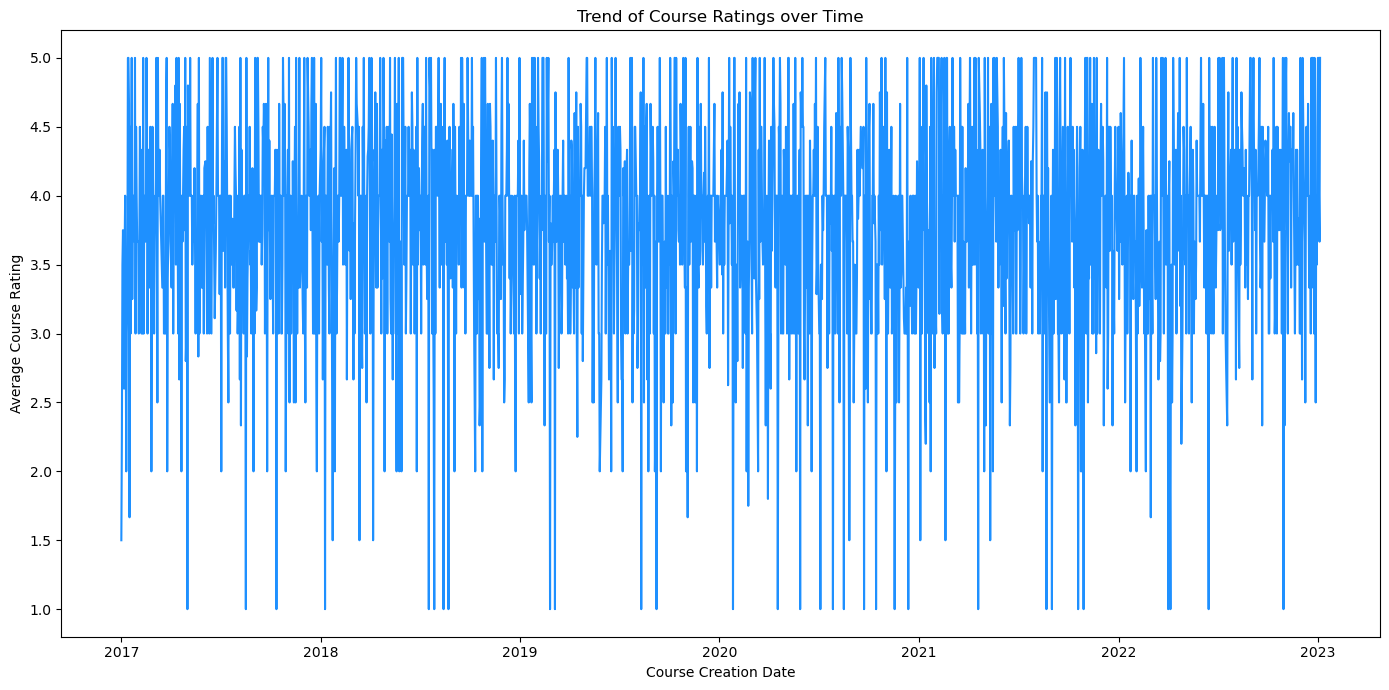

In [9]:
# Convert created_time to datetime format
course_data['created_time'] = pd.to_datetime(course_data['created_time'], dayfirst=True)

# Plotting course ratings over time
plt.figure(figsize=(14, 7))
sns.lineplot(x='created_time', y='course_rating', data=course_data, ci=None, color='dodgerblue')
plt.title('Trend of Course Ratings over Time')
plt.xlabel('Course Creation Date')
plt.ylabel('Average Course Rating')
plt.tight_layout()
plt.show()


Trend of Course Ratings over Time:

There seems to be some variability in average course ratings over time.
We observe certain periods where the average rating is relatively high and others where it dips.
It's important to note that each point represents the average rating of courses created around that time, and the variability might be influenced by the number of courses and ratings during each period.

### Course Levels

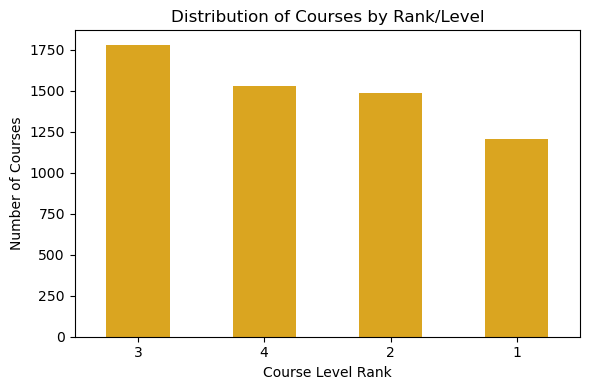

In [10]:
# Distribution of courses based on their rank or level
course_level_distribution = course_data['course_levelrank'].value_counts()

plt.figure(figsize=(6, 4))
course_level_distribution.plot(kind='bar', color='goldenrod')
plt.title('Distribution of Courses by Rank/Level')
plt.xlabel('Course Level Rank')
plt.ylabel('Number of Courses')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Distribution of Courses by Rank/Level:

The majority of courses fall under the level rank of 3, followed by level ranks 4 and 2.
Courses with level rank 1 are less common in comparison.
This distribution suggests that most courses are tailored towards intermediate to advanced levels, with fewer courses targeting complete beginners or complete experts.